importacao de biblioticas


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import os
import matplotlib.pyplot as plt

vvvv

Importacao e limpeza de dados


In [4]:
pla_fib_1 = pd.read_csv(os.path.join('Lab2', 'PLA FIBRA DE CARBONO', 'PLA FIBRA DE CARBONO_1_2.csv'), encoding='utf-8', delimiter=';')    
pla_fib_2 = pd.read_csv(os.path.join('Lab2', 'PLA FIBRA DE CARBONO', 'PLA FIBRA DE CARBONO_2_2.csv'), encoding='utf-8', delimiter=';') 
pla_fib_3 = pd.read_csv(os.path.join('Lab2', 'PLA FIBRA DE CARBONO', 'PLA FIBRA DE CARBONO_3_2.csv'), encoding='utf-8', delimiter=';') 

pla_norm_1 = pd.read_csv(os.path.join('Lab2', 'PLA Tenacidade à fratura', 'PLA NORMAL C-FISSURA_1_2.csv'), encoding='utf-8', delimiter=';', skip_blank_lines=True)    
pla_norm_2 = pd.read_csv(os.path.join('Lab2', 'PLA Tenacidade à fratura', 'PLA NORMAL C-FISSURA_2_2.csv'), encoding='utf-8', delimiter=';', skip_blank_lines=True) 
pla_norm_3 = pd.read_csv(os.path.join('Lab2', 'PLA Tenacidade à fratura', 'PLA NORMAL C-FISSURA_3_2.csv'), encoding='utf-8', delimiter=';', skip_blank_lines=True) 

pla_fibs = [pla_fib_1, pla_fib_2, pla_fib_3]
pla_norms = [pla_norm_1, pla_norm_2, pla_norm_3]


for i in range(len(pla_fibs)):
    pla_fibs[i] = pla_fibs[i].drop(0)
    pla_fibs[i] = pla_fibs[i].map(lambda x: x.replace(',', '.').replace('"', '') if isinstance(x, str) else x)
    pla_fibs[i] = pla_fibs[i].astype(float)

for i in range(len(pla_norms)):
    pla_norms[i] = pla_norms[i].drop(0)
    pla_norms[i] = pla_norms[i].map(lambda x: x.replace(',', '.').replace('"', '') if isinstance(x, str) else x)
    pla_norms[i] = pla_norms[i].astype(float)





Geracao de dados importantes


In [15]:
print('FIBRA DE CARBONO')
for i in range(len(pla_fibs)):
    tensao = pla_fibs[i][' Tensão à flexão']
    deformacao = pla_fibs[i][' Deslocamento']

    # Filter to get the initial linear region (up to 0.02 strain)
    linear_region = pla_fibs[i][pla_fibs[i][' Deslocamento'] < 2]
    tensao_linear = linear_region[' Tensão à flexão']
    deformacao_linear = linear_region[' Deslocamento']

    # Use linear regression to find the slope (Young's modulus)
    slope, intercept, _, _, _ = linregress(deformacao_linear/100, tensao_linear) #agnt divide por 100 pq a deformacao ta em porcentagem
    modulo_elasticidade = slope

    # Filter to get the plastic region (from 0.02 strain to the end)
    plastic_region = pla_fibs[i][(pla_fibs[i][' Deslocamento'] >= 2) & (pla_fibs[i][' Deslocamento'] <= 12)]
    tensao_plastic = plastic_region[' Tensão à flexão']
    deformacao_plastic = plastic_region[' Deslocamento']

    # Calculate the plastic modulus using linear regression
    slope_plastic, intercept_plastic, _, _, _ = linregress(deformacao_plastic/100, tensao_plastic)
    modulo_plastico = slope_plastic

    resistencia_maxima = tensao.max()
    deformacao_maxima = deformacao[tensao.idxmax()] #deformacao na resistencia maxima
    resistencia_ruptura = tensao.iloc[-1]
    deformacao_ruptura = deformacao.iloc[-1]
    tenacidade = np.trapz(tensao, deformacao)
    poisson = np.abs(modulo_plastico/modulo_elasticidade)

    print(f"Amostra {i+1}:")
    print(f" - Módulo de Elasticidade: {modulo_elasticidade:.2f} MPa")
    print(f" - Resistência Máxima: {resistencia_maxima:.2f} MPa")
    print(f" - Deformação na Resistência Máxima: {deformacao_maxima:.4f}%")
    print(f" - Resistência na Ruptura: {resistencia_ruptura:.2f} MPa")
    print(f" - Deformação na Ruptura: {deformacao_ruptura:.4f}")
    print(f" - Tenacidade: {tenacidade:.2f} J/m³")
    print(f" - Coeficiente de Poisson: {poisson:.2f}")
    print("-" * 40)

print('PLA NORMAL')
for i in range(len(pla_norms)):
    tensao = pla_norms[i][' Tensão à flexão']
    deformacao = pla_norms[i][' Deslocamento']

    # Filter to get the initial linear region (up to 0.02 strain)
    linear_region = pla_norms[i][pla_norms[i][' Deslocamento'] < 2]
    tensao_linear = linear_region[' Tensão à flexão']
    deformacao_linear = linear_region[' Deslocamento']

    # Use linear regression to find the slope (Young's modulus)
    slope, intercept, _, _, _ = linregress(deformacao_linear/100, tensao_linear) #agnt divide por 100 pq a deformacao ta em porcentagem
    modulo_elasticidade = slope

    # Filter to get the plastic region (from 0.02 strain to the end)
    plastic_region = pla_norms[i][(pla_norms[i][' Deslocamento'] >= 2)]
    tensao_plastic = plastic_region[' Tensão à flexão']
    deformacao_plastic = plastic_region[' Deslocamento']

    # Calculate the plastic modulus using linear regression
    slope_plastic, intercept_plastic, _, _, _ = linregress(deformacao_plastic/100, tensao_plastic)
    modulo_plastico = slope_plastic

    resistencia_maxima = tensao.max()
    deformacao_maxima = deformacao[tensao.idxmax()] #deformacao na resistencia maxima
    resistencia_ruptura = tensao.iloc[-1]
    deformacao_ruptura = deformacao.iloc[-1]
    tenacidade = np.trapz(tensao, deformacao)
    poisson = np.abs(modulo_plastico/modulo_elasticidade)


    print(f"Amostra {i+1}:")
    print(f" - Módulo de Elasticidade: {modulo_elasticidade:.2f} MPa")
    print(f" - Resistência Máxima: {resistencia_maxima:.2f} MPa")
    print(f" - Deformação na Resistência Máxima: {deformacao_maxima:.4f}%")
    print(f" - Resistência na Ruptura: {resistencia_ruptura:.2f} MPa")
    print(f" - Deformação na Ruptura: {deformacao_ruptura:.4f}")
    print(f" - Tenacidade: {tenacidade:.2f} J/m³")
    print(f" - Coeficiente de Poisson: {poisson:.2f}")
    print("-" * 40)


FIBRA DE CARBONO
Amostra 1:
 - Módulo de Elasticidade: 3666.78 MPa
 - Resistência Máxima: 58.89 MPa
 - Deformação na Resistência Máxima: 3.6106%
 - Resistência na Ruptura: 45.50 MPa
 - Deformação na Ruptura: 14.6792
 - Tenacidade: 710.95 J/m³
 - Coeficiente de Poisson: 0.01
----------------------------------------
Amostra 2:
 - Módulo de Elasticidade: 3239.00 MPa
 - Resistência Máxima: 63.20 MPa
 - Deformação na Resistência Máxima: 2.9075%
 - Resistência na Ruptura: 5.97 MPa
 - Deformação na Ruptura: 14.9392
 - Tenacidade: 506.73 J/m³
 - Coeficiente de Poisson: 0.21
----------------------------------------
Amostra 3:
 - Módulo de Elasticidade: 3289.67 MPa
 - Resistência Máxima: 62.70 MPa
 - Deformação na Resistência Máxima: 2.9713%
 - Resistência na Ruptura: 31.19 MPa
 - Deformação na Ruptura: 16.6901
 - Tenacidade: 857.45 J/m³
 - Coeficiente de Poisson: 0.03
----------------------------------------
PLA NORMAL
Amostra 1:
 - Módulo de Elasticidade: 1552.61 MPa
 - Resistência Máxima: 27.

Plotagem dos graficos


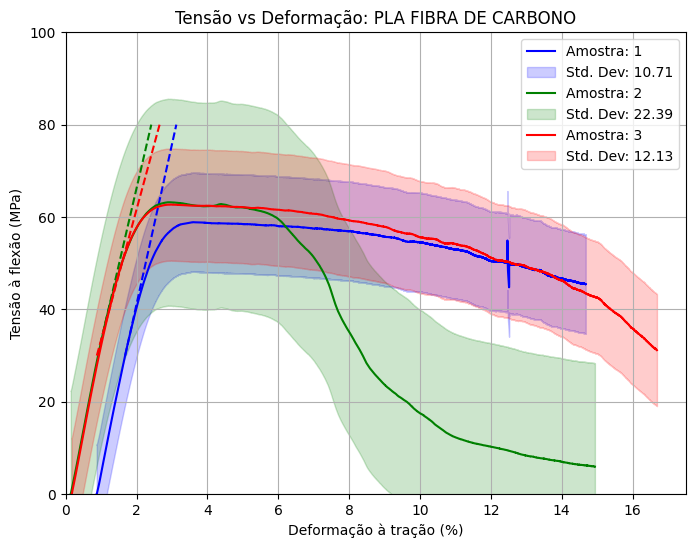

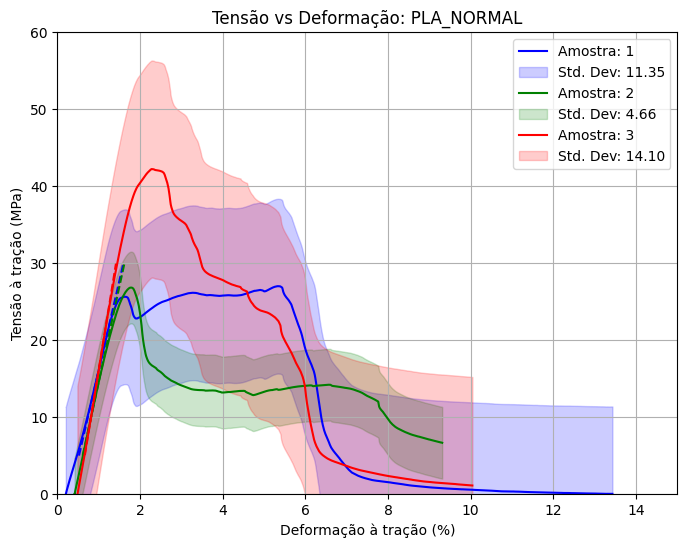

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# First figure for 'pla_fibs' data
plt.figure(figsize=(8, 6))
for i in range(len(pla_fibs)):
    deslocamento = pla_fibs[i][' Deslocamento']
    tensao_flexao = pla_fibs[i][' Tensão à flexão']

    # Filter data from 0 to 2.5
    '''
    mask = (deslocamento >= 0) & (deslocamento <= 2.5)
    deslocamento = deslocamento[mask]
    tensao_flexao = tensao_flexao[mask]
    '''
    
    # Plot main data
    plt.plot(deslocamento, tensao_flexao, label=f'Amostra: {i + 1}', color=colors[i])
    
    # Calculate standard deviation and fill
    std_dev = np.std(tensao_flexao)
    plt.fill_between(deslocamento, tensao_flexao - std_dev, tensao_flexao + std_dev,
                     color=colors[i], alpha=0.2, label=f'Std. Dev: {std_dev:.2f}')


    # Calculate tangent line at the middle point
    mid_idx = len(deslocamento) //15  # index for the middle point
    x0, y0 = deslocamento[mid_idx], tensao_flexao[mid_idx]
    slope, intercept = np.polyfit(deslocamento[mid_idx-1:mid_idx+2], tensao_flexao[mid_idx-1:mid_idx+2], 1)
    tangent_line = slope * (deslocamento - x0) + y0

  # Limit tangent line values between y = 40 and y = 80
    mask = (tangent_line >= 30) & (tangent_line <= 80)
    deslocamento = deslocamento[mask]
    tangent_line = tangent_line[mask]


    # Plot tangent line
    plt.plot(deslocamento, tangent_line, '--', color=colors[i])
    plt.xlim(0, 17.5)
    plt.ylim(0, 100)

    # Add labels, grid, title, and legend
    plt.xlabel('Deformação à tração (%)')
    plt.ylabel('Tensão à flexão (MPa)')
    plt.title(f'Tensão vs Deformação: PLA FIBRA DE CARBONO')
    plt.grid(True)
    plt.legend()
plt.savefig(os.path.join('Lab2', 'figs', f'PLA_FIBRA_DE_CARBONO.png'))

# Second figure for 'pla_norms' data
plt.figure(figsize=(8, 6))
for i in range(len(pla_norms)):
    deslocamento = pla_norms[i][' Deslocamento']
    tensao_flexao = pla_norms[i][' Tensão à flexão']

    # Plot main data
    plt.plot(deslocamento, tensao_flexao, label=f'Amostra: {i + 1}', color=colors[i])
    
    # Calculate standard deviation and fill
    std_dev = np.std(tensao_flexao)
    plt.fill_between(deslocamento, tensao_flexao - std_dev, tensao_flexao + std_dev,
                     color=colors[i], alpha=0.2, label=f'Std. Dev: {std_dev:.2f}')

    # Calculate tangent line at the middle point
    mid_idx = len(deslocamento) //15
    x0, y0 = deslocamento[mid_idx], tensao_flexao[mid_idx]
    # Use numpy's polyfit to get the slope of the tangent line at the middle point
    slope, intercept = np.polyfit(deslocamento[mid_idx-1:mid_idx+2], tensao_flexao[mid_idx-1:mid_idx+2], 1)
    tangent_line = slope * (deslocamento - x0) + y0


    # Limit tangent line values between y = 40 and y = 80
    mask = (tangent_line >= 5) & (tangent_line <= 30)
    deslocamento = deslocamento[mask]
    tangent_line = tangent_line[mask]

    # Plot tangent line
    plt.plot(deslocamento, tangent_line, '--', color=colors[i])
    plt.xlim(0, 15)
    plt.ylim(0, 60)

    # Add labels, grid, title, and legend
    plt.xlabel('Deformação à tração (%)')
    plt.ylabel('Tensão à tração (MPa)')
    plt.title(f'Tensão vs Deformação: PLA_NORMAL')
    plt.grid(True)
    plt.legend()
plt.savefig(os.path.join('Lab2', 'figs', f'PLA NORMAL'))
